In [ ]:
from google.colab import files

# Upload your .pth file
uploaded = files.upload()


In [2]:
import torch
import torch.nn as nn

class PlantDiseaseCNN(nn.Module):
    def __init__(self, num_classes):
        super(PlantDiseaseCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [10]:
class_names = [
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Cedar_apple_rust',
    'Apple___healthy',
    'Blueberry___healthy',
    'Cherry_(including_sour)___Powdery_mildew',
    'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy',
    'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)',
    'Peach___Bacterial_spot',
    'Peach___healthy',
    'Pepper,_bell___Bacterial_spot',
    'Pepper,_bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Raspberry___healthy',
    'Soybean___healthy',
    'Squash___Powdery_mildew',
    'Strawberry___Leaf_scorch',
    'Strawberry___healthy',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy',
    'Background_without_leaves'  # ✅ This is usually the one people miss
]

num_classes = len(class_names)
print("✅ Total classes:", num_classes)


✅ Total classes: 39


In [11]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = PlantDiseaseCNN(num_classes)

try:
    state_dict = torch.load("plant_disease_cnn.pth", map_location=device)
    model.load_state_dict(state_dict)
    model.to(device)
    model.eval()
    print("✅ Model loaded successfully!")

except RuntimeError as e:
    print("❌ RuntimeError while loading model:")
    print(e)

except Exception as e:
    print("❌ Some other error occurred:")
    print(e)



✅ Model loaded successfully!


In [12]:
from google.colab import files
uploaded = files.upload()


Saving test image.jpeg to test image.jpeg


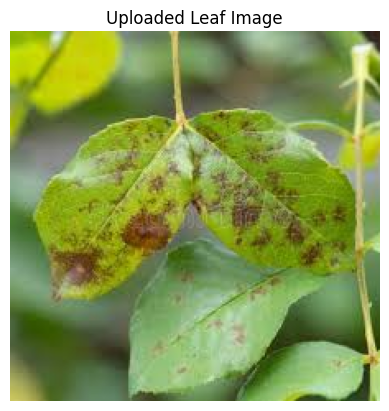

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = list(uploaded.keys())[0]  # get uploaded filename
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.title("Uploaded Leaf Image")
plt.axis("off")
plt.show()


In [14]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


In [15]:
# Prepare input
input_tensor = transform(image).unsqueeze(0).to(device)

# Inference
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)
    prediction = class_names[predicted.item()]

print("🌿 Predicted Class:", prediction)


🌿 Predicted Class: Grape___Black_rot


In [16]:
from google.colab import files
uploaded = files.upload()


Saving test img 2.jpeg to test img 2.jpeg


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


In [17]:
# Prepare input
input_tensor = transform(image).unsqueeze(0).to(device)

# Inference
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)
    prediction = class_names[predicted.item()]

print("🌿 Predicted Class:", prediction)


🌿 Predicted Class: Grape___Black_rot


Saving 0c80eea7-7c6f-4f3c-be3d-6cca9ec30c1b___Com.G_TgS_FL 0991.JPG to 0c80eea7-7c6f-4f3c-be3d-6cca9ec30c1b___Com.G_TgS_FL 0991.JPG


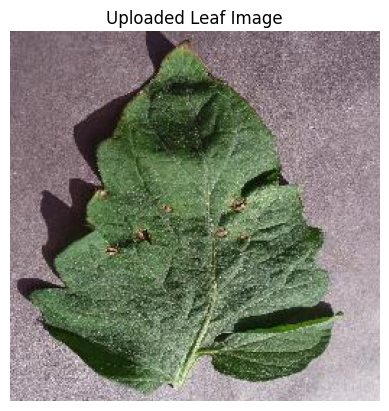

🌿 Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
⚠️ The plant is diseased.


In [19]:
# Upload image
from google.colab import files
uploaded = files.upload()

# Show image
from PIL import Image
import matplotlib.pyplot as plt
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.title("Uploaded Leaf Image")
plt.axis("off")
plt.show()

# Transform
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Predict
input_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)
    prediction = class_names[predicted.item()]

print("🌿 Predicted Class:", prediction)

# Health Check
if "healthy" in prediction.lower():
    print("✅ The plant is healthy.")
else:
    print("⚠️ The plant is diseased.")
